# Baseline

The results of the following projects were used:

https://www.kaggle.com/code/wadors/proyecto2/input

https://www.kaggle.com/code/monicacinthya/water-potability-eda

Colunms
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

Drinking water that is not potable causes health problems and, in turn, this causes a higher health expense, for which it seeks to create a model that predicts whether the water is drinkable or not; In this way, improve the quality of life and reduce health costs caused by consuming water that is not drinkable.

Several models have been made with an accuracy between 60% and 70% of prediction if the water is drinkable or not.

A model is sought that at least has an average of 65% in accuracy or higher. The objective of this project is for the subject of Deployment of machine learning models and it is a proof of concept.


# Setup
In this notebook section, we will import the libraries needed to run this code.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno as msno

# ML
from scipy import stats
from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, metrics, optimizers

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


In [92]:
data_set = pd.read_csv(DATASETS_DIR) 
data_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [84]:
data_set.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [85]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [86]:
data_set.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [87]:
data_set = data_set.fillna(data_set.mean())

In [88]:
data_set.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [89]:
data_set = (data_set - data_set.min()) / (data_set.max() - data_set.min())
data_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120,1.0


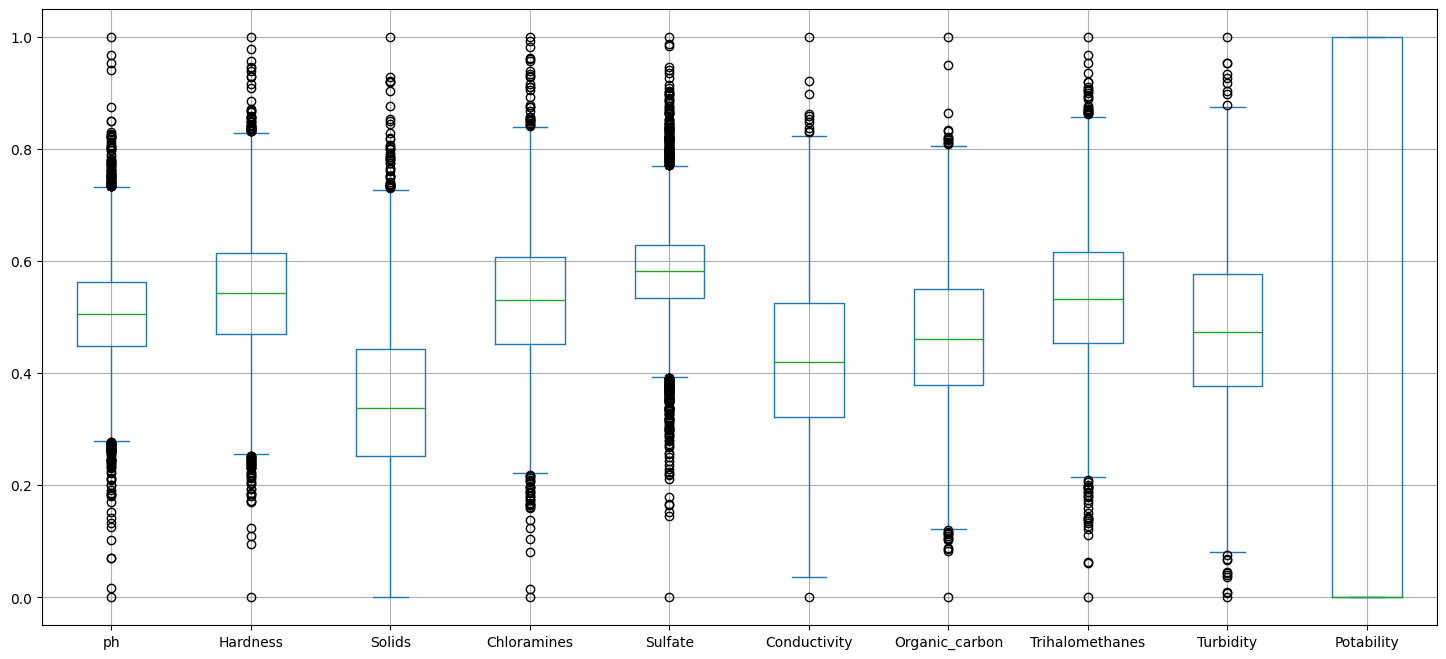

In [90]:
data_set.plot(kind = 'box',
              figsize = (18,8)
)
plt.grid()

In [64]:
z_scores = zscore(data_set)
Datos_limpios = (np.abs(z_scores) < 2.5).all(axis=1)
data_set = data_set[Datos_limpios]

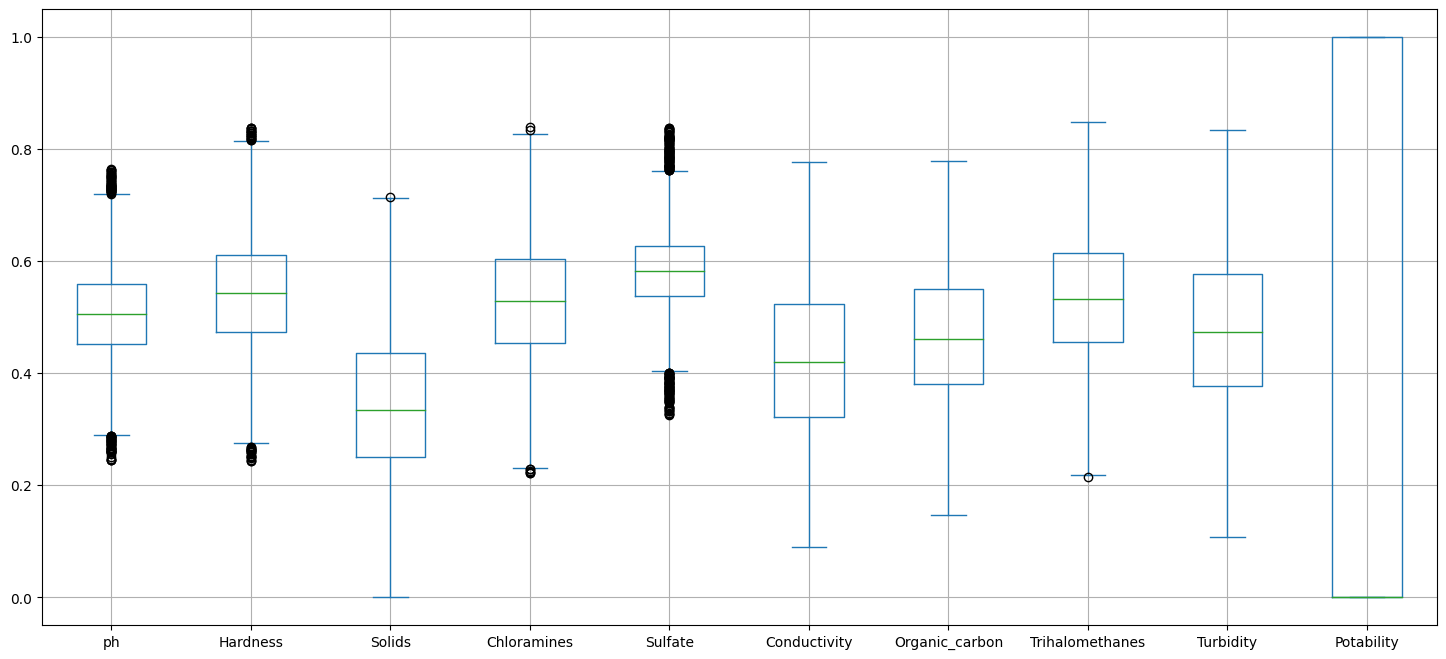

In [65]:
data_set.plot(kind = 'box',
                figsize = (18,8)
)
plt.grid()

In [66]:
data_set = data_set.reset_index()
del data_set['index']
data_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
2820,0.433544,0.505009,0.423895,0.578908,0.615572,0.409897,0.378070,0.484188,0.419685,1.0
2821,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915,1.0
2822,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570,1.0
2823,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120,1.0


Text(0.5, 1.0, 'Correlación de las variables')

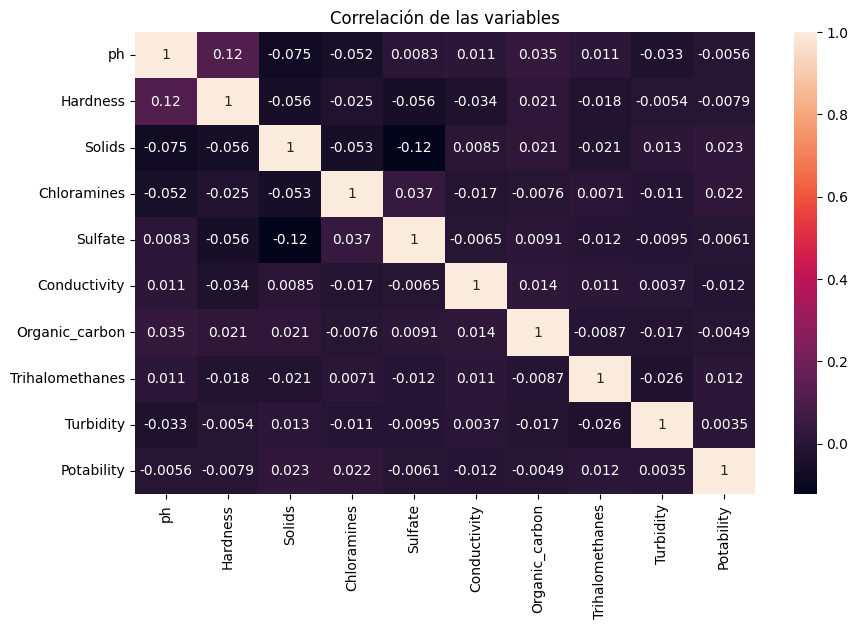

In [67]:
corr = data_set.corr()
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(corr,
            xticklabels = True,
            yticklabels = True,
            annot = True,
            ax=ax
)
plt.title('Correlación de las variables')

In [94]:
data_set_X = data_set.drop(['Potability'], axis = 1).values

In [73]:
data_set_Y = data_set['Potability'].values
data_set_Y

array([0., 0., 0., ..., 1., 1., 1.])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data_set_X, data_set_Y, test_size = 0.2, random_state = 0)

In [75]:
param_GB = {'n_estimators': range(100, 1000, 100),
            'max_depth': range(2, 6),
            'loss': ['deviance', 'exponential']}

In [76]:
GradBoost = GradientBoostingClassifier()

In [77]:
gsearch_GB = GridSearchCV(GradBoost, param_grid=param_GB, scoring='r2', cv=5, return_train_score=True)

In [78]:
gsearch_GB.fit(X_train, y_train)

c:\Users\jesus.alcantar\Documents\GitHub\IntegratorProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jesus.alcantar\Documents\GitHub\IntegratorProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jesus.alcantar\Documents\GitHub\IntegratorProject\venv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\jesus.alcantar\Documents\GitHub\IntegratorProject

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'max_depth': range(2, 6),
                         'n_estimators': range(100, 1000, 100)},
             return_train_score=True, scoring='r2')

In [ ]:
#GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
#             param_grid={'loss': ['deviance', 'exponential'],
#                         'max_depth': range(2, 6),
#                         'n_estimators': range(100, 1000, 100)},
#             return_train_score=True, scoring='r2')

In [79]:
gsearch_GB.best_params_, gsearch_GB.best_score_

({'loss': 'exponential', 'max_depth': 4, 'n_estimators': 100},
 -0.4570254862508385)

In [80]:
gsearch_GB.best_estimator_.score(X_test, y_test)

0.6123893805309735